In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams
%matplotlib inline
rcParams['figure.figsize'] = 10,8
sns.set(style='whitegrid', palette='muted',
        rc={'figure.figsize': (15,10)})
import os
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

#from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

from numpy.random import seed

from sklearn.metrics import f1_score
# LOADING LIBRARIES
import os
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from keras.models import Sequential, Model
from keras.layers import Dense, Input

import numpy as np
from keras.models import Model
from keras.layers import Input, Dense
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
# print(os.listdir("../input"))
print('done')

done


In [ ]:
train = pd.read_csv('/content/train_clean.csv')

test = pd.read_csv('/content/test_clean.csv')

In [ ]:
X = train.drop
#didnt use Title
y = train['Survived']
x_test = test[['Pclass','Sex','Age','SibSp','Parch','Fare','Cabin','Embarked','Ticket']]

In [ ]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 30 )

In [ ]:
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras import regularizers

# پارامترهای مدل
input_dim = X_train.shape[1]  # تعداد ویژگی‌ها
learning_rate = 1e-4

# تعریف لایه‌های مدل
input_layer = Input(shape=(input_dim,))

# Encoder
encoder = Dense(32, activation="relu", activity_regularizer=regularizers.l1(learning_rate))(input_layer)
encoder = BatchNormalization()(encoder)  # اضافه کردن BatchNorm
encoder = Dense(24, activation="relu")(encoder)
encoder = BatchNormalization()(encoder)  # اضافه کردن BatchNorm
encoder = Dropout(0.2)(encoder)  # اضافه کردن Dropout
encoder = Dense(16, activation="relu")(encoder)
encoder = BatchNormalization()(encoder)  # اضافه کردن BatchNorm
encoder = Dense(12, activation="relu")(encoder)
encoder = BatchNormalization()(encoder)  # اضافه کردن BatchNorm
encoder = Dropout(0.2)(encoder)  # اضافه کردن Dropout
encoder = Dense(6, activation="relu")(encoder)
encoder_output = Dense(3 , activation="relu")(encoder)

# طبقه‌بند (classifier)
classifier = Dense(64, activation='relu')(encoder_output)  # لایه مخفی
classifier = Dropout(0.3)(classifier)  # اضافه کردن Dropout برای جلوگیری از overfitting
classifier = Dense(32, activation='relu')(classifier)  # لایه مخفی دیگر
classifier_output = Dense(2, activation='softmax', name="classifier_output")(classifier)  # لایه خروجی برای طبقه‌بندی

# تعریف مدل نهایی
classification_model = Model(inputs=input_layer, outputs=classifier_output)

# کامپایل کردن مدل
classification_model.compile(optimizer='adam',
                             loss='sparse_categorical_crossentropy',
                             metrics=['accuracy'])

# فیت کردن مدل با داده‌های آموزشی و برچسب‌ها
history = classification_model.fit(X_train, y_train,
                                    epochs=100, batch_size=256,
                                    validation_data=(X_test, y_test))

# پیش‌بینی با مدل
y_pred = classification_model.predict(X_test)

print("پیش‌بینی‌های مدل:", y_pred)



Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 182ms/step - accuracy: 0.4975 - loss: 27594.7305 - val_accuracy: 0.7333 - val_loss: 3129.1565
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5949 - loss: 26336.3281 - val_accuracy: 0.7333 - val_loss: 3075.5884
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6022 - loss: 24656.8184 - val_accuracy: 0.7333 - val_loss: 3022.8533
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6197 - loss: 24031.9453 - val_accuracy: 0.7333 - val_loss: 2970.2329
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6060 - loss: 25258.0605 - val_accuracy: 0.7333 - val_loss: 2918.5334
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6125 - loss: 24531.6191 - val_accuracy: 0.7333 - val_loss: 2868.2590
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6158 - loss: 22846.6758 - val_accuracy: 0.7333 - val_loss: 2818.1462
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5985

In [ ]:
results = (y_pred[:, 0] > 0.5).astype(int)

results

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Layer

def threshold_to_class(probabilities , threshold=0.5):
    return (probabilities[:, 1] >= threshold).astype(int)


y_pred_probabilities = classification_model.predict(X_train)

y_pred_classes = threshold_to_class(y_pred_probabilities)

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  


In [ ]:
print(y_pred_classes)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 

In [ ]:
print("Dimensions of y_test:", y_train.shape)
print("Dimensions of y_pred_classes:", y_pred_classes.shape)


Dimensions of y_test: (861,)
Dimensions of y_pred_classes: (861,)


In [ ]:
from sklearn.metrics import f1_score, accuracy_score, classification_report


# محاسبه F1 Score
f1 = f1_score(y_train, y_pred_classes)
print(f'F1 Score: {f1}')

# محاسبه دقت
accuracy = accuracy_score(y_train, y_pred_classes)
print(f'Accuracy: {accuracy}')

# گزارش کامل طبقه‌بندی
report = classification_report(y_train, y_pred_classes)
print(f'Classification Report:\n{report}')


F1 Score: 0.5654450261780105
Accuracy: 0.42160278745644597
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.07      0.14       527
           1       0.40      0.97      0.57       334

    accuracy                           0.42       861
   macro avg       0.60      0.52      0.35       861
weighted avg       0.64      0.42      0.30       861



In [ ]:
print(history.history.keys())



dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


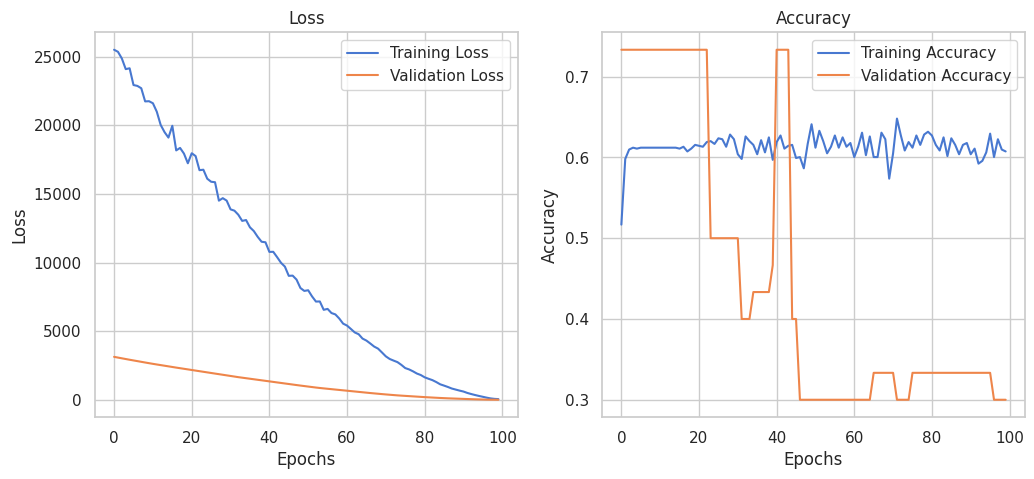

In [ ]:
import matplotlib.pyplot as plt

# استخراج داده‌های آموزش و اعتبارسنجی
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# رسم نمودار خطا
plt.figure(figsize=(12, 5))

# نمودار خطا
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# نمودار دقت
plt.subplot(1, 2, 2)
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# نما


In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,5.0,7.2500,2.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.0,1,0,17599.0,71.2833,2.0,2.0
2,3,1,3,"Heikkinen, Miss. Laina",2,26.0,0,0,2.0,7.9250,2.0,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.0,1,0,113803.0,53.1000,2.0,1.0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450.0,8.0500,2.0,1.0


In [ ]:
import numpy as np

# استخراج اولین سطر از DataFrame
sample_df1 = X_test.iloc[0]  # این یک سری (Series) است

# تبدیل سری به آرایه NumPy و افزودن بعد batch
# اطمینان از تبدیل نوع داده‌ها به float32
sample_input = np.array(sample_df, dtype=np.float32).reshape(1, -1)  # تبدیل به آرایه 2D با ابعاد (1, تعداد ویژگی‌ها)

# پیش‌بینی با استفاده از مدل
prediction = classification_model.predict(sample_input)

# نمایش پیش‌بینی
print("پیش‌بینی مدل برای اولین سطر DataFrame:", prediction)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
پیش‌بینی مدل برای اولین سطر DataFrame: [[0.61433876 0.38566118]]


In [ ]:
import numpy as np

# انتخاب سطر دوم از DataFrame
sample_df2 = X_train.iloc[1]  # این یک سری (Series) است

# تبدیل سری به آرایه NumPy و افزودن بعد batch
sample_input = np.array(sample_df).reshape(1, -1)  # تبدیل به آرایه 2D با ابعاد (1, تعداد ویژگی‌ها)

# پیش‌بینی با استفاده از مدل
prediction = classification_model.predict(sample_input)

# نمایش پیش‌بینی
print("پیش‌بینی مدل برای دومین سطر DataFrame:", prediction)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
پیش‌بینی مدل برای دومین سطر DataFrame: [[0.61433876 0.38566118]]


In [ ]:
import numpy as np

# انتخاب سطر سوم از DataFrame
sample_df3 = X_train.iloc[2]  # این یک سری (Series) است

# تبدیل سری به آرایه NumPy و افزودن بعد batch
sample_input = np.array(sample_df).reshape(1, -1)  # تبدیل به آرایه 2D با ابعاد (1, تعداد ویژگی‌ها)

# پیش‌بینی با استفاده از مدل
prediction = classification_model.predict(sample_input)

# نمایش پیش‌بینی
print("پیش‌بینی مدل برای سومین سطر DataFrame:", prediction)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
پیش‌بینی مدل برای سومین سطر DataFrame: [[0.61433876 0.38566118]]


In [ ]:
import numpy as np

# انتخاب سطر چهارم از DataFrame
sample_df4 = X_train.iloc[3]  # شماره سطر چهارم با ایندکس 3

# تبدیل سری به آرایه NumPy و افزودن بعد batch
sample_input = np.array(sample_df).reshape(1, -1)  # تبدیل به آرایه 2D با ابعاد (1, تعداد ویژگی‌ها)

# پیش‌بینی با استفاده از مدل
prediction = classification_model.predict(sample_input)

# نمایش پیش‌بینی
print("پیش‌بینی مدل برای سطر چهارم DataFrame:", prediction)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
پیش‌بینی مدل برای سطر چهارم DataFrame: [[0.61433876 0.38566118]]
